In [1]:
import pandas as pd
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='svg'

In [2]:
df = pd.read_sas(r'C:\Users\1000257489\Documents\2022\Programs\20220915 Media Bay 3 Bin\0920\overall_data_3bin.sas7bdat', format = 'sas7bdat', encoding='iso-8859-1')
df.shape

(689652, 3)

In [3]:
df.head()

,OW_R0_DB,TSE2,RMK
0,27.427299,0.0,GC5_PHO_3bin_BadBay_BFWK26
1,26.076000,0.0,GC5_PHO_3bin_GoodBay_BFWK26
2,27.151100,0.0,GC5_PHO_3bin_BadBay_BFWK26
3,27.399700,0.0,GC5_PHO_3bin_BadBay_BFWK26
4,27.452801,0.0,GC5_PHO_3bin_BadBay_BFWK26


In [4]:
df['RMK'].value_counts()

GC5_PHO_3bin_GoodBay_BFWK26    319086
GC5_PHO_3bin_GoodBay_AFWK26    229549
GC5_PHO_3bin_BadBay_AFWK26      70859
GC5_PHO_3bin_BadBay_BFWK26      70158
Name: RMK, dtype: int64

In [5]:
df['OWP_BIN'] = np.round(df['OW_R0_DB']/0.2, 0)*0.2
df.groupby('OWP_BIN')['OW_R0_DB'].agg(['min', 'max', 'count'])

,min,max,count
OWP_BIN,,,
19.6,19.674900,19.674900,1
20.8,20.785801,20.851700,3
21.0,20.936600,21.093100,4
21.2,21.142099,21.285601,8
21.4,21.304800,21.497801,14
...,...,...,...
40.8,40.777100,40.777100,1
41.4,41.412399,41.412399,1
41.6,41.532101,41.532101,1


In [6]:
summary_df = df.groupby(['OWP_BIN', 'RMK'], as_index=False)['TSE2'].agg({'TSE2_FR': 'mean',
                                                                        'Qty': 'count'})
summary_df.head()

,OWP_BIN,RMK,TSE2_FR,Qty
0,19.6,GC5_PHO_3bin_GoodBay_AFWK26,0.0,1
1,20.8,GC5_PHO_3bin_GoodBay_BFWK26,0.0,3
2,21.0,GC5_PHO_3bin_BadBay_BFWK26,0.0,1
3,21.0,GC5_PHO_3bin_GoodBay_AFWK26,0.0,1
4,21.0,GC5_PHO_3bin_GoodBay_BFWK26,0.0,2


In [7]:
# summary_df['OWP_BIN'] = summary_df['OWP_BIN'].astype('O')

In [10]:
summary_df.RMK.unique()[2]

'GC5_PHO_3bin_BadBay_BFWK26'

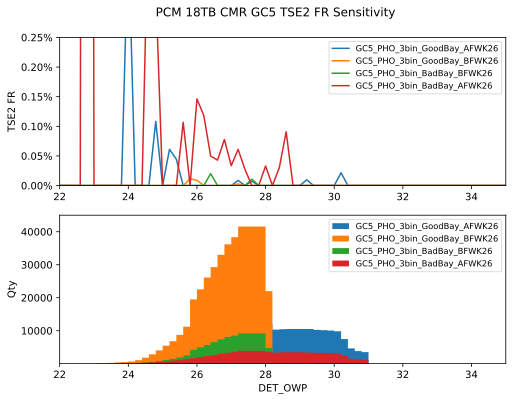

In [13]:
from matplotlib import ticker

fig = plt.figure(figsize=(8, 6), dpi=120)
ax1= fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2, sharex=ax1)

df_sub0 = summary_df.loc[summary_df.RMK==summary_df.RMK.unique()[0]]
df_sub1 = summary_df.loc[summary_df.RMK==summary_df.RMK.unique()[1]]
df_sub2 = summary_df.loc[summary_df.RMK==summary_df.RMK.unique()[2]]
df_sub3 = summary_df.loc[summary_df.RMK==summary_df.RMK.unique()[3]]

ax1.plot(df_sub0.OWP_BIN, df_sub0.TSE2_FR, ls='-', lw=1.5, label=summary_df.RMK.unique()[0])
ax1.plot(df_sub1.OWP_BIN, df_sub1.TSE2_FR, ls='-', lw=1.5, label=summary_df.RMK.unique()[1])
ax1.plot(df_sub2.OWP_BIN, df_sub2.TSE2_FR, ls='-', lw=1.5, label=summary_df.RMK.unique()[2])
ax1.plot(df_sub3.OWP_BIN, df_sub3.TSE2_FR, ls='-', lw=1.5, label=summary_df.RMK.unique()[3])
ax1.set_ylim(0, 0.0025)
ax1.set_xlim(22, 35)
ax1.set_ylabel('TSE2 FR')
ax1.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=2))
ax1.legend(loc='upper right', frameon=True, edgecolor='lightgray', fontsize='small')
# plt.grid(which='both')


ax2.bar(df_sub0.OWP_BIN, df_sub0.Qty, label=summary_df.RMK.unique()[0], alpha=1)
ax2.bar(df_sub1.OWP_BIN, df_sub1.Qty, label=summary_df.RMK.unique()[1], alpha=1)
ax2.bar(df_sub2.OWP_BIN, df_sub2.Qty, label=summary_df.RMK.unique()[2], alpha=1)
ax2.bar(df_sub3.OWP_BIN, df_sub3.Qty, label=summary_df.RMK.unique()[3], alpha=1)
ax2.set_ylim(100, 45000)
ax2.set_ylabel('Qty')
# ax2.set_yscale('log', base=10, subs=[2, 3, 4]) #对数坐标
ax2.legend(loc='upper right', frameon=True, edgecolor='lightgray', fontsize='small')

fig.suptitle('PCM 18TB CMR GC5 TSE2 FR Sensitivity', y=0.95)
plt.xlabel('DET_OWP')
plt.savefig('Sensitivity Plot.png', dpi=200)
plt.show()

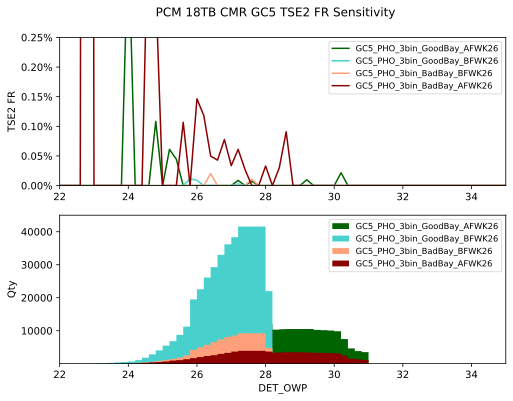

In [12]:
# self-defining colors
from matplotlib import ticker
colors = ['darkgreen','mediumturquoise','darkred','lightsalmon','darkblue','cornflowerblue']
fig = plt.figure(figsize=(8, 6), dpi=120)
ax1= fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2, sharex=ax1)

df_sub0 = summary_df.loc[summary_df.RMK==summary_df.RMK.unique()[0]]
df_sub1 = summary_df.loc[summary_df.RMK==summary_df.RMK.unique()[1]]
df_sub2 = summary_df.loc[summary_df.RMK==summary_df.RMK.unique()[2]]
df_sub3 = summary_df.loc[summary_df.RMK==summary_df.RMK.unique()[3]]

ax1.plot(df_sub0.OWP_BIN, df_sub0.TSE2_FR, ls='-', lw=1.5, label=summary_df.RMK.unique()[0], color=colors[0])
ax1.plot(df_sub1.OWP_BIN, df_sub1.TSE2_FR, ls='-', lw=1.5, label=summary_df.RMK.unique()[1], color=colors[1])
ax1.plot(df_sub2.OWP_BIN, df_sub2.TSE2_FR, ls='-', lw=1.5, label=summary_df.RMK.unique()[2], color=colors[3])
ax1.plot(df_sub3.OWP_BIN, df_sub3.TSE2_FR, ls='-', lw=1.5, label=summary_df.RMK.unique()[3], color=colors[2])
ax1.set_ylim(0, 0.0025)
ax1.set_xlim(22, 35)
ax1.set_ylabel('TSE2 FR')
ax1.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=2))
ax1.legend(loc='upper right', frameon=True, edgecolor='lightgray', fontsize='small')
# plt.grid(which='both')


ax2.bar(df_sub0.OWP_BIN, df_sub0.Qty, label=summary_df.RMK.unique()[0], alpha=1, color=colors[0])
ax2.bar(df_sub1.OWP_BIN, df_sub1.Qty, label=summary_df.RMK.unique()[1], alpha=1, color=colors[1])
ax2.bar(df_sub2.OWP_BIN, df_sub2.Qty, label=summary_df.RMK.unique()[2], alpha=1, color=colors[3])
ax2.bar(df_sub3.OWP_BIN, df_sub3.Qty, label=summary_df.RMK.unique()[3], alpha=1, color=colors[2])
ax2.set_ylim(100, 45000)
ax2.set_ylabel('Qty')
# ax2.set_yscale('log', base=10, subs=[2, 3, 4]) #对数坐标
ax2.legend(loc='upper right', frameon=True, edgecolor='lightgray', fontsize='small')

fig.suptitle('PCM 18TB CMR GC5 TSE2 FR Sensitivity', y=0.95)
plt.xlabel('DET_OWP')
plt.savefig('Sensitivity Plot.png', dpi=200)
plt.show()